<a href="https://colab.research.google.com/github/101Sania/NN_project/blob/main/modifiedcharacter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

# Install unzip (if not installed)
!apt-get install unzip -y

# Create a local directory (not in Google Drive)
!mkdir -p /content/dataset3

# Extract the ZIP file to the local directory
!unzip -o "/content/drive/My Drive/CMATERdb 3.1.4.zip" -d "/content/dataset3/"

# Optional: Move extracted dataset to Google Drive if needed
#!cp -r /content/dataset3 "/content/drive/My Drive/"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Archive:  /content/drive/My Drive/CMATERdb 3.1.4.zip
   creating: /content/dataset3/CMATERdb 3.1.4/
   creating: /content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/
   creating: /content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Test/
   creating: /content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Test/222/
  inflating: /content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Test/222/bcc000000.bmp  
  inflating: /content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Test/222/bcc000001.bmp  
  inflating: /content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Test/222/bcc000002.bmp  
  inflating: /content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Test/222/bcc000003.bmp  
  inflating: /content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Test/222/bcc000004.bmp 

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import os
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
bengali_char_map = {
    0: "া", 1: "ি", 2: "ী", 3: "ু", 4: "ূ", 5: "ে", 6: "ৈ", 7: "ো", 8: "ৌ", 9: "্য"
}

In [ ]:
import cv2
import numpy as np
import os

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Warning: Unable to read image at {image_path}")
        return None
    image = cv2.resize(image, (32, 32))  # Resize to a fixed size
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

In [ ]:
def load_dataset(dataset_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))
    valid_extensions = ('.bmp', '.png', '.jpg', '.jpeg')  # Add other valid extensions if needed
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for image_name in os.listdir(class_path):
            if image_name.lower().endswith(valid_extensions):
                image_path = os.path.join(class_path, image_name)
                image = load_and_preprocess_image(image_path)
                if image is not None:
                    images.append(image)
                    labels.append(label)
    return np.array(images, dtype=np.float32), np.array(labels, dtype=np.int32), class_names

In [ ]:
# Dataset paths
train_dataset_path = '/content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Train'
test_dataset_path = '/content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Test'

train_images, train_labels, train_class_names = load_dataset(train_dataset_path)
test_images, test_labels, test_class_names = load_dataset(test_dataset_path)

In [ ]:
def build_ann_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

In [ ]:
from sklearn.model_selection import train_test_split
train_images1, X_vali, train_labels1, y_vali = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [ ]:
# Build Model
input_shape = (32, 32, 1)  # Height, Width, Channels
num_classes = len(train_class_names)  # Number of unique Bengali letters

model = build_ann_model(input_shape, num_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,927 (2.63 MB)

 Trainable params: 689,927 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(X_vali, y_vali))

# Evaluate the model
model.evaluate(test_images, test_labels)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3421 - loss: 1.7621 - val_accuracy: 0.7439 - val_loss: 0.7129
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7696 - loss: 0.6379 - val_accuracy: 0.8354 - val_loss: 0.4721
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8358 - loss: 0.4625 - val_accuracy: 0.8232 - val_loss: 0.5089
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8439 - loss: 0.4617 - val_accuracy: 0.8476 - val_loss: 0.3582
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8410 - loss: 0.4034 - val_accuracy: 0.9024 - val_loss: 0.3034
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8771 - loss: 0.3596 - val_accuracy: 0.5366 - val_loss: 1.1915
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7803 - loss: 0.5863 - val_accuracy: 0.8841 - val_loss: 0.3221
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9127 - loss: 0.2618 - val_accuracy: 0.

[0.42479434609413147, 0.936117947101593]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted label: 1, Predicted text: ি


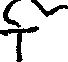

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Predict text from a new image
new_image_path = '/content/dataset3/CMATERdb 3.1.4/ModifierFinalDatabase/Train/223/bcc000235.bmp'
new_image = load_and_preprocess_image(new_image_path)

if new_image is not None:
    prediction = model.predict(np.expand_dims(new_image, axis=0))
    predicted_label = np.argmax(prediction)

    # Get the Bengali character using the mapping dictionary
    predicted_text = bengali_char_map.get(predicted_label, "Unknown")

    print(f"Predicted label: {predicted_label}, Predicted text: {predicted_text}")

    # Display the image using OpenCV
    img = cv2.imread(new_image_path)
    cv2_imshow(img)

else:
    print("Unable to read the new image.")

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to plot correlation matrix
def plot_correlation_matrix(y_true, y_pred, class_names):
    conf_matrix = confusion_matrix(y_true, y_pred)
    corr_matrix = np.corrcoef(conf_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=class_names, yticklabels=class_names)
    plt.title("Correlation Matrix of Bengali Characters")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_probs, num_classes):
    y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

    plt.figure(figsize=(10, 8))

    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--")  # Random guessing line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Bengali Character Classification")
    plt.legend()
    plt.show()

# Predict on test set
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


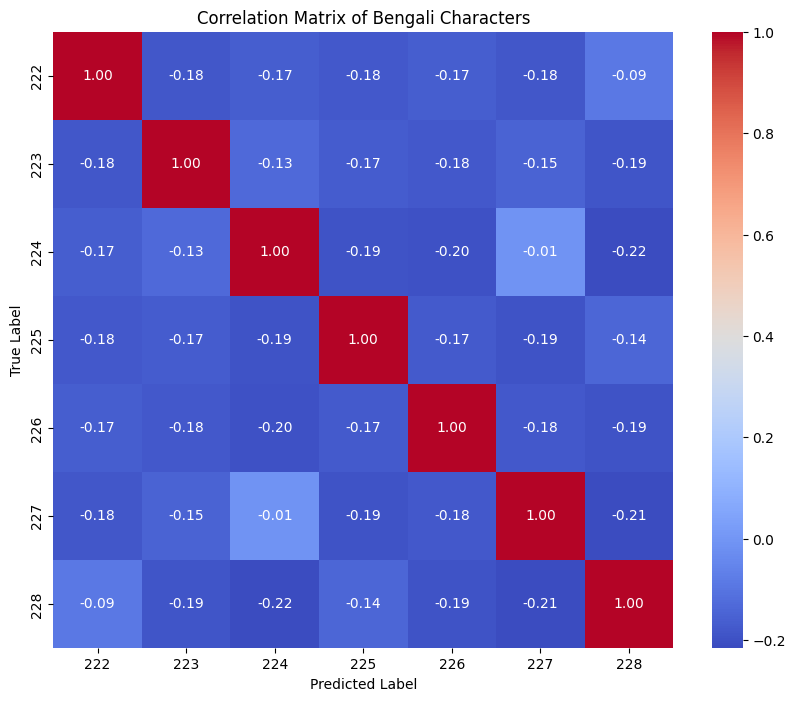

In [ ]:
plot_correlation_matrix(test_labels, y_pred, train_class_names)

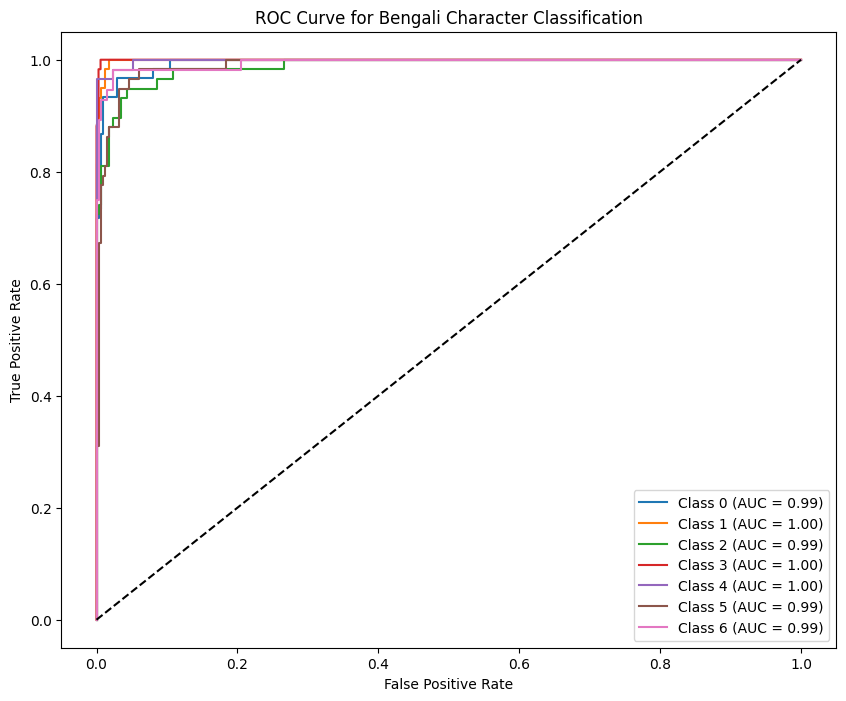

In [ ]:
plot_roc_curve(test_labels, y_pred_probs, len(train_class_names))